In [47]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        r'D:\projects\hackethons\brain_dead_hack\Ps2\Train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 1810 images belonging to 4 classes.


In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['angry', 'happy', 'neutral', 'sad']

In [5]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        r'D:\projects\hackethons\brain_dead_hack\Ps2\Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 369 images belonging to 4 classes.


In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['angry', 'happy', 'neutral', 'sad']

In [7]:
from keras.regularizers import l2

In [8]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [9]:
from keras.models import Sequential

In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE,3)
model = Sequential([
        Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Flatten(),
        Dense(4, activation='softmax'),
    ])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [10]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

In [10]:

model.compile(
    optimizer=Adam(lr=0.001),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

C:\Users\amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
from keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(patience=5)
model_train=model.fit(train_generator,batch_size=BATCH_SIZE,verbose=1,epochs=30, callbacks=[early_stop])

Epoch 1/30
57/57 [==============================] - 108s 2s/step - loss: 2.2872 - accuracy: 0.3017
Epoch 2/30
57/57 [==============================] - 105s 2s/step - loss: 1.8084 - accuracy: 0.3210
Epoch 3/30
57/57 [==============================] - 107s 2s/step - loss: 1.6797 - accuracy: 0.3403
Epoch 4/30
57/57 [==============================] - 110s 2s/step - loss: 1.5538 - accuracy: 0.3845
Epoch 5/30
57/57 [==============================] - 109s 2s/step - loss: 1.4428 - accuracy: 0.4381
Epoch 6/30
57/57 [==============================] - 105s 2s/step - loss: 1.3331 - accuracy: 0.5050
Epoch 7/30
57/57 [==============================] - 109s 2s/step - loss: 1.2255 - accuracy: 0.5448
Epoch 8/30
57/57 [==============================] - 107s 2s/step - loss: 1.1050 - accuracy: 0.5906
Epoch 9/30
57/57 [==============================] - 105s 2s/step - loss: 1.0235 - accuracy: 0.6348
Epoch 10/30
57/57 [==============================] - 104s 2s/step - loss: 0.9856 - accuracy: 0.6464
Epoch 11/

In [15]:
scores=model.evaluate(test_generator)

12/12 [==============================] - 11s 905ms/step - loss: 1.2197 - accuracy: 0.6016


In [16]:
early_stop = EarlyStopping(patience=5)
model_train=model.fit(train_generator,batch_size=BATCH_SIZE,verbose=1,epochs=50, callbacks=[early_stop])

Epoch 1/50
57/57 [==============================] - 105s 2s/step - loss: 0.5664 - accuracy: 0.8044
Epoch 2/50
57/57 [==============================] - 104s 2s/step - loss: 0.5669 - accuracy: 0.8110
Epoch 3/50
57/57 [==============================] - 103s 2s/step - loss: 0.5868 - accuracy: 0.7923
Epoch 4/50
57/57 [==============================] - 105s 2s/step - loss: 0.5433 - accuracy: 0.8149
Epoch 5/50
57/57 [==============================] - 105s 2s/step - loss: 0.5399 - accuracy: 0.8182
Epoch 6/50
57/57 [==============================] - 104s 2s/step - loss: 0.5270 - accuracy: 0.8337
Epoch 7/50
57/57 [==============================] - 104s 2s/step - loss: 0.5441 - accuracy: 0.8265
Epoch 8/50
57/57 [==============================] - 104s 2s/step - loss: 0.5232 - accuracy: 0.8271
Epoch 9/50
57/57 [==============================] - 104s 2s/step - loss: 0.5240 - accuracy: 0.8171
Epoch 10/50
57/57 [==============================] - 104s 2s/step - loss: 0.5191 - accuracy: 0.8276
Epoch 11/

In [17]:
early_stop = EarlyStopping(patience=5)
model_train=model.fit(train_generator,batch_size=BATCH_SIZE,verbose=1,epochs=50, callbacks=[early_stop])

Epoch 1/50
57/57 [==============================] - 102s 2s/step - loss: 0.4029 - accuracy: 0.8724
Epoch 2/50
57/57 [==============================] - 102s 2s/step - loss: 0.4081 - accuracy: 0.8646
Epoch 3/50
57/57 [==============================] - 102s 2s/step - loss: 0.3848 - accuracy: 0.8773
Epoch 4/50
57/57 [==============================] - 104s 2s/step - loss: 0.4056 - accuracy: 0.8691
Epoch 5/50
57/57 [==============================] - 106s 2s/step - loss: 0.3840 - accuracy: 0.8851
Epoch 6/50
57/57 [==============================] - 110s 2s/step - loss: 0.3966 - accuracy: 0.8740
Epoch 7/50
57/57 [==============================] - 132s 2s/step - loss: 0.3893 - accuracy: 0.8785
Epoch 8/50
57/57 [==============================] - 103s 2s/step - loss: 0.3828 - accuracy: 0.8757
Epoch 9/50
57/57 [==============================] - 106s 2s/step - loss: 0.4041 - accuracy: 0.8657
Epoch 10/50
57/57 [==============================] - 107s 2s/step - loss: 0.3764 - accuracy: 0.8812
Epoch 11/

In [18]:
early_stop = EarlyStopping(patience=5)
model_train=model.fit(train_generator,batch_size=BATCH_SIZE,verbose=1,epochs=50, callbacks=[early_stop])

Epoch 1/50
57/57 [==============================] - 114s 2s/step - loss: 0.3339 - accuracy: 0.8989
Epoch 2/50
57/57 [==============================] - 102s 2s/step - loss: 0.3310 - accuracy: 0.9033
Epoch 3/50
57/57 [==============================] - 102s 2s/step - loss: 0.3309 - accuracy: 0.8956
Epoch 4/50
57/57 [==============================] - 103s 2s/step - loss: 0.3401 - accuracy: 0.8928
Epoch 5/50
57/57 [==============================] - 103s 2s/step - loss: 0.3425 - accuracy: 0.8956
Epoch 6/50
57/57 [==============================] - 103s 2s/step - loss: 0.3518 - accuracy: 0.8867
Epoch 7/50
57/57 [==============================] - 103s 2s/step - loss: 0.3338 - accuracy: 0.8983
Epoch 8/50
57/57 [==============================] - 104s 2s/step - loss: 0.3478 - accuracy: 0.8912
Epoch 9/50
57/57 [==============================] - 108s 2s/step - loss: 0.3497 - accuracy: 0.9017
Epoch 10/50
57/57 [==============================] - 110s 2s/step - loss: 0.3421 - accuracy: 0.8901
Epoch 11/

In [26]:
early_stop = EarlyStopping(patience=5)
history=model.fit(train_generator,batch_size=BATCH_SIZE,verbose=1,epochs=1, callbacks=[early_stop])

57/57 [==============================] - 115s 2s/step - loss: 0.8918 - accuracy: 0.6525


1/1 [==============================] - 0s 45ms/step


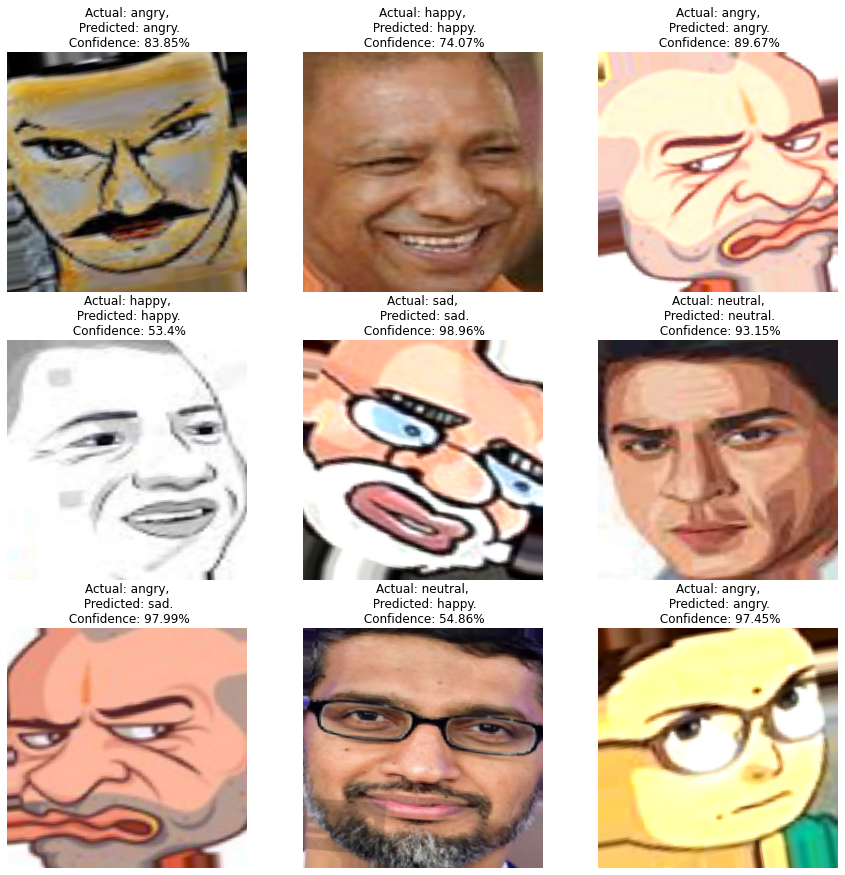

In [23]:
#look at the confidence of the model
#do not run now
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    def predict(model, img):
        img_array = tf.keras.preprocessing.image.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)

        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        return predicted_class,confidence
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [30]:
train_accuracy = history.history['accuracy']

train_loss = history.history['loss']


In [63]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : angry
1 : happy
2 : neutral
3 : sad


IndexError: list index out of range

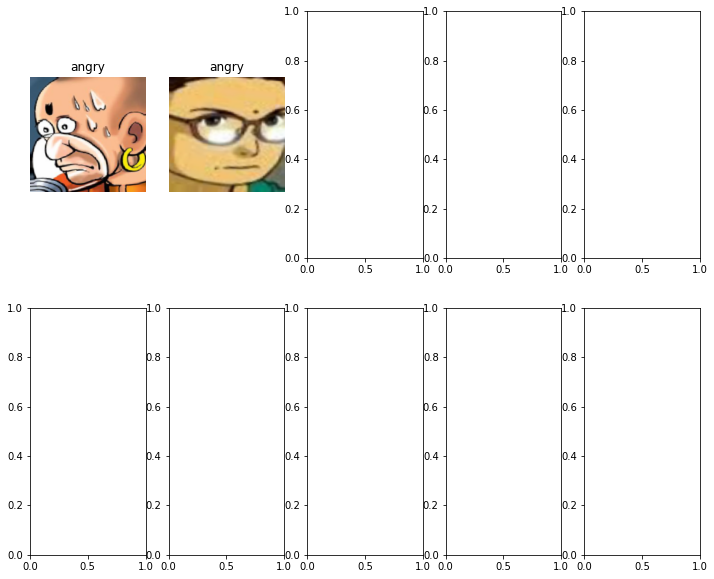

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(scores[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [18]:
#code for confusion matrix
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

12/12 [==============================] - 11s 848ms/step
Confusion Matrix
[[16 39  8 17]
 [34 34 10 27]
 [24 44  9 25]
 [20 37 11 14]]


In [19]:
#code for classification Accuracy
from sklearn.metrics import accuracy_score
print('Classification Accuracy')
print(accuracy_score(test_generator.classes, y_pred))

Classification Accuracy
0.1978319783197832


In [20]:
#code for classification report
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     class 0       0.17      0.20      0.18        80
     class 1       0.22      0.32      0.26       105
     class 2       0.24      0.09      0.13       102
     class 3       0.17      0.17      0.17        82

    accuracy                           0.20       369
   macro avg       0.20      0.20      0.19       369
weighted avg       0.20      0.20      0.19       369

